In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth,SpectralClustering,AffinityPropagation
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler
import warnings

# Doc-wise Display preferences.
warnings.filterwarnings('ignore') # Don't show warnings
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
def printmd(string):
    "prints text in bold"
    display(Markdown(string))

In [2]:
data = pd.read_csv('2014.csv')
data

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.250,W1,8,NaN,...,8,3.270,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.950,F1,1,NaN,...,21,5.300,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.600,W2,1,NaN,...,1,3.080,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.580,F2,3,NaN,...,27,5.370,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.230,W3,2,NaN,...,2,3.100,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.680,F3,4,NaN,...,28,5.370,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.650,W4,4,NaN,...,4,3.230,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.830,5,5,NaN,...,5,4.970,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.230,W6,3,NaN,...,3,3.100,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.830,6,20,NaN,...,20,5.270,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [3]:
data.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [4]:
# Normalize the data.
X = []
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = normalize(data[[col]])
        X.append(col)     
        
# Reduce it to two components.
# X_pca = PCA(2).fit_transform(X)

data = data.drop(columns=['ctz','state','name','bib'])
list_to_numerical = ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k']
list_to_categorical = ['gender', 'country', 'city']
for i in list_to_numerical:
    data[i] = pd.to_numeric(data[i], errors='coerce')

for n in list_to_categorical:
    
#First, change the type of the column:
    data[n] = pd.Categorical(data[n])
#Now the data look similar but are stored categorically. To capture the category codes:
    data[n] = data[n].cat.codes
np.nan_to_num(data)
data.dropna(inplace=True)
df_normalize = StandardScaler().fit_transform(data)
data.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())


10k          True
division     True
25k          True
gender       True
age          True
official     True
genderdiv    True
35k          True
overall      True
pace         True
30k          True
5k           True
half         True
20k          True
country      True
city         True
40k          True
dtype: bool

For n_clusters=2, The Silhouette Coefficient is 0.4055175522000947


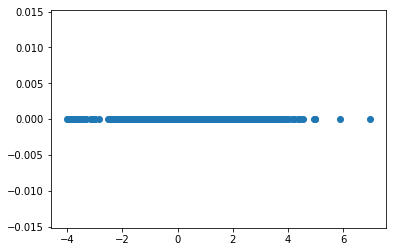

For n_clusters=3, The Silhouette Coefficient is 0.2950967844702972


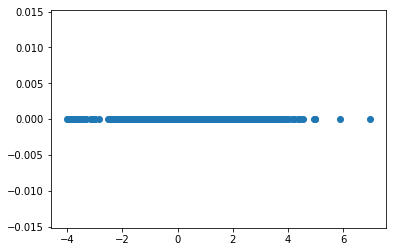

For n_clusters=4, The Silhouette Coefficient is 0.31602856008574925


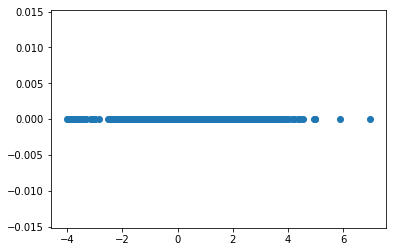

KeyboardInterrupt: 

In [5]:

# Define the features and the outcome.
X = df_normalize
Y = data['official']
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 5):
    y_pred = KMeans(n_clusters=n_cluster).fit(df_normalize)
    label = y_pred.labels_
    sil_coeff = silhouette_score(df_normalize, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()
    
    
    
    
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
sil_coeff = silhouette_score(X, labels, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))




plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()